# Zero Variance

In [1]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import boston dataset
data = pd.read_csv('C:\\Users\\vaibh\\Desktop\\360 Digitmg\\Data Preprocessing\\DataSets\\Z_dataset.csv')

In [3]:
# Top rows of dataset
data.head()

,Id,square.length,square.breadth,rec.Length,rec.breadth,colour
0,1,5.1,3.5,1.4,0.2,Blue
1,2,4.9,3.0,1.4,0.2,Blue
2,3,4.7,3.2,1.3,0.2,Blue
3,4,4.6,3.1,1.5,0.2,Blue
4,5,5.0,3.6,1.4,0.2,Blue


In [4]:
# Check the column titles
data.columns

Index(['Id', 'square.length', 'square.breadth', 'rec.Length', 'rec.breadth',
       'colour'],
      dtype='object')

In [5]:
# Shape of dataset
data.shape

(150, 6)

In [6]:
# Get data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              150 non-null    int64  
 1   square.length   150 non-null    float64
 2   square.breadth  150 non-null    float64
 3   rec.Length      150 non-null    float64
 4   rec.breadth     150 non-null    float64
 5   colour          150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
# Check for null values
data.isnull().sum()

Id                0
square.length     0
square.breadth    0
rec.Length        0
rec.breadth       0
colour            0
dtype: int64

There are no null values in the given datasets 

In [8]:
# Check for duplicate values

data.duplicated().sum()

0

There are no duplicate values

In [9]:
# Display desciptive statistics for the dataset
data.describe()

,Id,square.length,square.breadth,rec.Length,rec.breadth
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
# Creat feature Dictionary
feature_dict = pd.DataFrame(columns=['Name of Feature','Description','Type','Relevance'])

feature_dict ['Name of Feature'] = data.columns

feature_dict ['Description'] = ['Sr.No.',
'Length of square',
'Width of square',
'Length of rectangle',
'Width of rectangle','Color of object']

feature_dict['Type'] = ['Ratio','Ratio','Ratio','Ratio',
                        'Ratio','Nominal']

feature_dict['Relevance'] = ['Irrelevant','Relevant','Relevant',
                            'Relevant','Relevant','Relevant']

feature_dict

,Name of Feature,Description,Type,Relevance
0,Id,Sr.No.,Ratio,Irrelevant
1,square.length,Length of square,Ratio,Relevant
2,square.breadth,Width of square,Ratio,Relevant
3,rec.Length,Length of rectangle,Ratio,Relevant
4,rec.breadth,Width of rectangle,Ratio,Relevant
5,colour,Color of object,Nominal,Relevant


In [11]:
# Dropping Irrelevant feature
data.drop(['Id'],axis = 1,inplace = True)

In [12]:
data.head()

,square.length,square.breadth,rec.Length,rec.breadth,colour
0,5.1,3.5,1.4,0.2,Blue
1,4.9,3.0,1.4,0.2,Blue
2,4.7,3.2,1.3,0.2,Blue
3,4.6,3.1,1.5,0.2,Blue
4,5.0,3.6,1.4,0.2,Blue


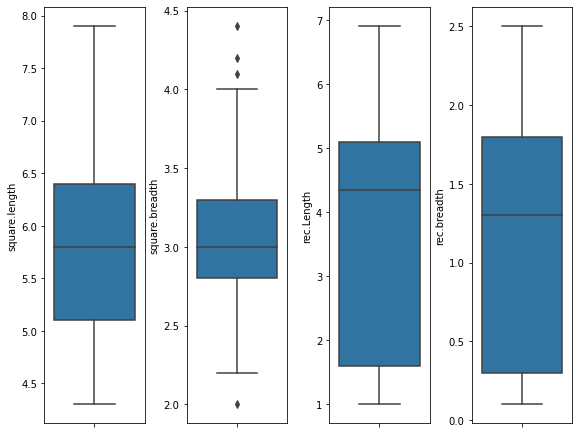

In [13]:
# Boxplot for all the features in the dataset to check for outliers

fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(8, 6))
index = 0
axs = axs.flatten()
data1 = data.iloc[:,:4]
for k,v in data1.items():
    sns.boxplot(y=k, data=data1, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.55, w_pad=0.5, h_pad=4.0)

Outliers are present in square_breath

In [14]:
#Using IQR for outlier treatments

IQR = data['square.breadth'].quantile(0.75) - data['square.breadth'].quantile(0.25)
low_end = data['square.breadth'].quantile(0.25) - (1.5*IQR)
upper_end = data['square.breadth'].quantile(0.75) + (1.5*IQR)
data['square.breadth'] = pd.DataFrame(np.where(data['square.breadth'] > upper_end,upper_end, 
                      np.where(data['square.breadth'] < low_end,low_end,data['square.breadth'])))
data.head() 

,square.length,square.breadth,rec.Length,rec.breadth,colour
0,5.1,3.5,1.4,0.2,Blue
1,4.9,3.0,1.4,0.2,Blue
2,4.7,3.2,1.3,0.2,Blue
3,4.6,3.1,1.5,0.2,Blue
4,5.0,3.6,1.4,0.2,Blue


<AxesSubplot:xlabel='square.breadth'>

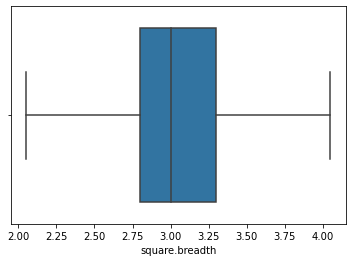

In [15]:
# Boxplot for Square.breadth (outliers removed)

sns.boxplot(x = data['square.breadth'])

In [16]:
# checking for unique values in colour feature
data.colour.unique()

array(['Blue', 'Green', 'Orange'], dtype=object)

In [17]:
data.colour.value_counts()

Blue      50
Green     50
Orange    50
Name: colour, dtype: int64

In [18]:
# Label encoding colour feature
data.colour = data.colour.map({'Blue':0,'Green':1,'Orange':2})

In [19]:
# Importing Variance Threshold for Zero Variance
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=0.05)
vt_data = vt.fit_transform(data)

In [20]:
# Returns False for features with given threshold variance
data = pd.DataFrame(vt_data, columns=vt.get_feature_names_out())
data

,square.length,square.breadth,rec.Length,rec.breadth,colour
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


There are no zero variance features

<AxesSubplot:xlabel='colour', ylabel='count'>

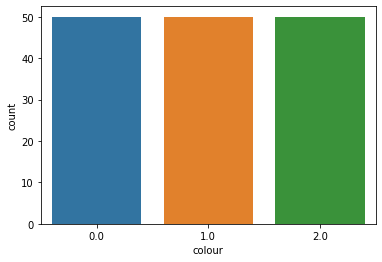

In [21]:
# Countplot for colour feature
sns.countplot(x = data.colour)

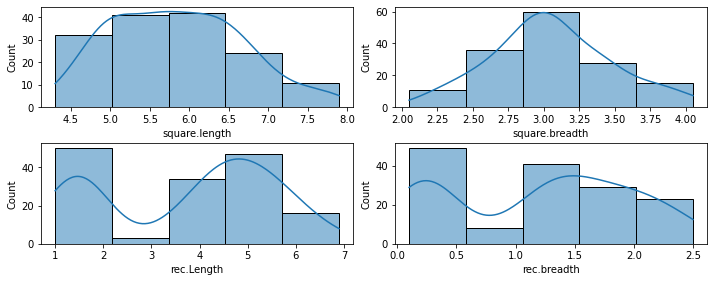

In [22]:
# Plotting histograms for all features
fig,axs = plt.subplots(2,2,figsize=(10,4))
axs = axs.flatten()
index = 0
for feat in data.iloc[:,:-1]:
    sns.histplot(x = data[feat],ax=axs[index],bins = 5,kde = True)
    index+=1
plt.tight_layout(w_pad=0.5, h_pad=0.5, pad=1)

The data is normally distributed for square length and breadth and bimodal for rectangulat length and breadth